In [441]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
    

In [450]:
kle_ = pd.read_csv('data/Life Expectancy Data.csv')

In [451]:
kle_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [452]:
kle_.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.00,263.00,62,0.01,71.28,65.00,1154,...,6.00,8.16,65.00,0.10,584.26,33736494.00,17.20,17.30,0.48,10.10
1,Afghanistan,2014,Developing,59.90,271.00,64,0.01,73.52,62.00,492,...,58.00,8.18,62.00,0.10,612.70,327582.00,17.50,17.50,0.48,10.00
2,Afghanistan,2013,Developing,59.90,268.00,66,0.01,73.22,64.00,430,...,62.00,8.13,64.00,0.10,631.74,31731688.00,17.70,17.70,0.47,9.90
3,Afghanistan,2012,Developing,59.50,272.00,69,0.01,78.18,67.00,2787,...,67.00,8.52,67.00,0.10,669.96,3696958.00,17.90,18.00,0.46,9.80
4,Afghanistan,2011,Developing,59.20,275.00,71,0.01,7.10,68.00,3013,...,68.00,7.87,68.00,0.10,63.54,2978599.00,18.20,18.20,0.45,9.50


In [453]:
kle_.rename(columns = {" BMI " :"BMI", 
                                  "Life expectancy ": "Life_expectancy",
                                  "Adult Mortality":"Adult_mortality",
                                  "infant deaths":"Infant_deaths",
                                  "percentage expenditure":"Percentage_expenditure",
                                  "Hepatitis B":"HepatitisB",
                                  "Measles ":"Measles",
                                  "under-five deaths ": "Under_five_deaths",
                                  "Total expenditure":"Total_expenditure",
                                  "Diphtheria ": "Diphtheria",
                                  " thinness  1-19 years":"Thinness_1-19_years",
                                  " thinness 5-9 years":"Thinness_5-9_years",
                                  " HIV/AIDS":"HIV/AIDS",
                                  "Income composition of resources":"Income_composition_of_resources"}, inplace = True)

In [454]:
kle_.drop(columns='Adult_mortality', inplace=True)

In [455]:
kle_.apply(lambda x: len(x.unique()))


Country                             193
Year                                 16
Status                                2
Life_expectancy                     363
Infant_deaths                       209
Alcohol                            1077
Percentage_expenditure             2328
HepatitisB                           88
Measles                             958
BMI                                 609
Under_five_deaths                   252
Polio                                74
Total_expenditure                   819
Diphtheria                           82
HIV/AIDS                            200
GDP                                2491
Population                         2279
Thinness_1-19_years                 201
Thinness_5-9_years                  208
Income_composition_of_resources     626
Schooling                           174
dtype: int64

<AxesSubplot:xlabel='Life_expectancy'>

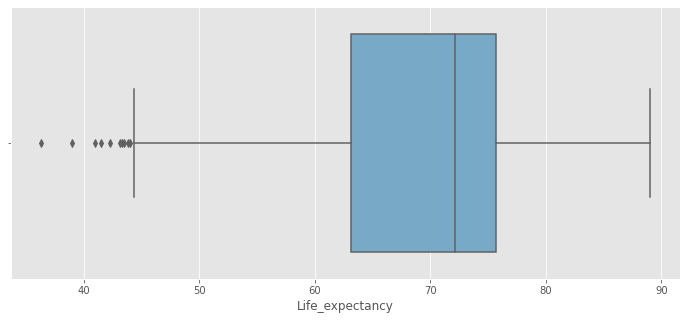

In [456]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x=kle_['Life_expectancy'], palette='Blues', ax=ax)


In [457]:
print(" Pre Outliers Shape: ", kle_.shape) # shows 1649 observations

Q1 = kle_.quantile(0.25) # defines 25th %ile
Q3 = kle_.quantile(0.75) # defines 75th %ile
IQR = Q3 - Q1 # defines interquartile range
Upper = Q3 + 1.5*IQR # defines upper limit for outliers
Lower = Q1 - 1.5*IQR # defines lower limit for outliers

print("UPPER LIMIT", Upper) # shows the value of upper limit so that we can use it
print("LOWER LIMIT", Lower) # shows the value of the lower limit so that we can use it

 Pre Outliers Shape:  (2938, 21)
UPPER LIMIT Year                                  2024.00
Life_expectancy                         94.60
Infant_deaths                           55.00
Alcohol                                 17.94
Percentage_expenditure                1096.81
HepatitisB                             127.00
Measles                                900.62
BMI                                    111.55
Under_five_deaths                       70.00
Polio                                  125.50
Total_expenditure                       12.34
Diphtheria                             125.50
HIV/AIDS                                 1.85
GDP                                  14081.11
Population                        18257207.62
Thinness_1-19_years                     15.60
Thinness_5-9_years                      15.75
Income_composition_of_resources          1.21
Schooling                               20.60
dtype: float64
LOWER LIMIT Year                                   1992.00
Life_ex

After Outliers Shape:  (2928, 21)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'After Removing Outliers in Life Expectancy')

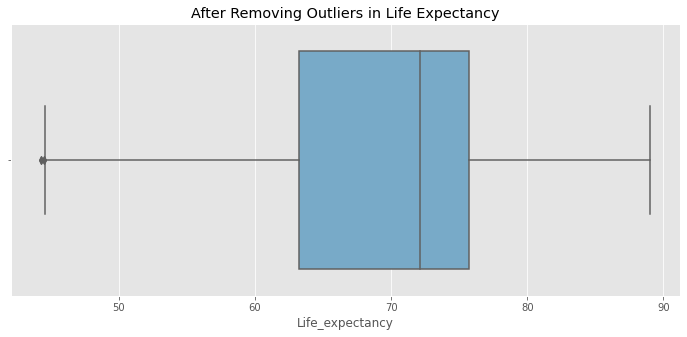

In [460]:
outlier = kle_[(kle_['Life_expectancy'] >= 94.6)|(kle['Life_expectancy'] <= 44.2)].index # identifies the outlier values
kle_.drop(outlier, inplace=True) # drops the outliers

print("After Outliers Shape: ", kle_.shape) 

fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x=kle_['Life_expectancy'], palette='Blues', ax=ax)
plt.title('After Removing Outliers in Life Expectancy')

In [461]:
kle_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life_expectancy                  2918 non-null   float64
 4   Infant_deaths                    2928 non-null   int64  
 5   Alcohol                          2734 non-null   float64
 6   Percentage_expenditure           2928 non-null   float64
 7   HepatitisB                       2384 non-null   float64
 8   Measles                          2928 non-null   int64  
 9   BMI                              2894 non-null   float64
 10  Under_five_deaths                2928 non-null   int64  
 11  Polio                            2909 non-null   float64
 12  Total_expenditure   

In [462]:
encoder = LabelEncoder()

In [464]:
kle_.Country = encoder.fit_transform(kle_.Country)
# kle.Year = encoder.fit_transform(kle.Year)
kle_.Status = encoder.fit_transform(kle_.Status)

In [465]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(kle_), columns=kle_.columns)
df.head()

,Country,Year,Status,Life_expectancy,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
0,0.00,1.00,1.00,0.46,0.03,0.00,0.00,0.65,0.01,0.21,...,0.03,0.45,0.65,0.00,0.00,0.03,0.62,0.60,0.51,0.49
1,0.00,0.93,1.00,0.35,0.04,0.00,0.00,0.62,0.00,0.20,...,0.57,0.45,0.62,0.00,0.01,0.00,0.63,0.61,0.50,0.48
2,0.00,0.87,1.00,0.35,0.04,0.00,0.00,0.64,0.00,0.20,...,0.61,0.45,0.64,0.00,0.01,0.02,0.64,0.62,0.50,0.48
3,0.00,0.80,1.00,0.34,0.04,0.00,0.00,0.67,0.01,0.19,...,0.67,0.47,0.67,0.00,0.01,0.00,0.64,0.63,0.49,0.47
4,0.00,0.73,1.00,0.33,0.04,0.00,0.00,0.68,0.01,0.19,...,0.68,0.44,0.68,0.00,0.00,0.00,0.66,0.64,0.48,0.46


In [466]:
df.Year.unique()

array([1.        , 0.93333333, 0.86666667, 0.8       , 0.73333333,
       0.66666667, 0.6       , 0.53333333, 0.46666667, 0.4       ,
       0.33333333, 0.26666667, 0.2       , 0.13333333, 0.06666667,
       0.        ])

In [468]:
kle_.Year.unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000])

### Imputing with KNN (missing values get replaced by the nearest neighbor estimated values)

In [469]:
len(df.Country.unique())

193

In [470]:
print('Pre na qty: ' + str(df.isnull().sum()))

Pre na qty: Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Infant_deaths                        0
Alcohol                            194
Percentage_expenditure               0
HepatitisB                         544
Measles                              0
BMI                                 34
Under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness_1-19_years                 34
Thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64


In [471]:
imputer = KNNImputer(n_neighbors=5)
df2 = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [473]:
df2.head()

,Country,Year,Status,Life_expectancy,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
0,0.00,1.00,1.00,0.46,0.03,0.00,0.00,0.65,0.01,0.21,...,0.03,0.45,0.65,0.00,0.00,0.03,0.62,0.60,0.51,0.49
1,0.00,0.93,1.00,0.35,0.04,0.00,0.00,0.62,0.00,0.20,...,0.57,0.45,0.62,0.00,0.01,0.00,0.63,0.61,0.50,0.48
2,0.00,0.87,1.00,0.35,0.04,0.00,0.00,0.64,0.00,0.20,...,0.61,0.45,0.64,0.00,0.01,0.02,0.64,0.62,0.50,0.48
3,0.00,0.80,1.00,0.34,0.04,0.00,0.00,0.67,0.01,0.19,...,0.67,0.47,0.67,0.00,0.01,0.00,0.64,0.63,0.49,0.47
4,0.00,0.73,1.00,0.33,0.04,0.00,0.00,0.68,0.01,0.19,...,0.68,0.44,0.68,0.00,0.00,0.00,0.66,0.64,0.48,0.46


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Life Expectancy')

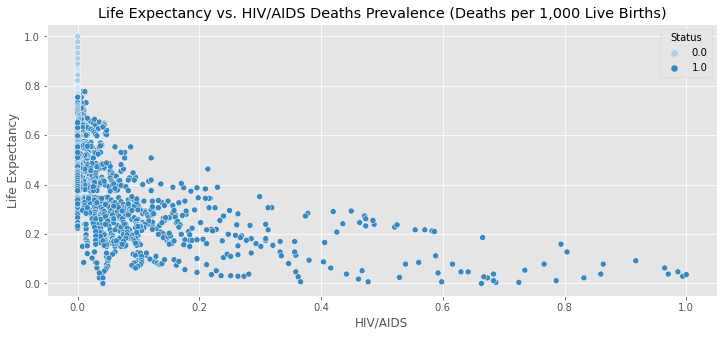

In [474]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot('HIV/AIDS', 'Life_expectancy', data=df2, hue='Status', palette='Blues', ax=ax)
plt.title('Life Expectancy vs. HIV/AIDS Deaths Prevalence (Deaths per 1,000 Live Births)')
plt.xlabel('HIV/AIDS')
plt.ylabel('Life Expectancy')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Life Expectancy')

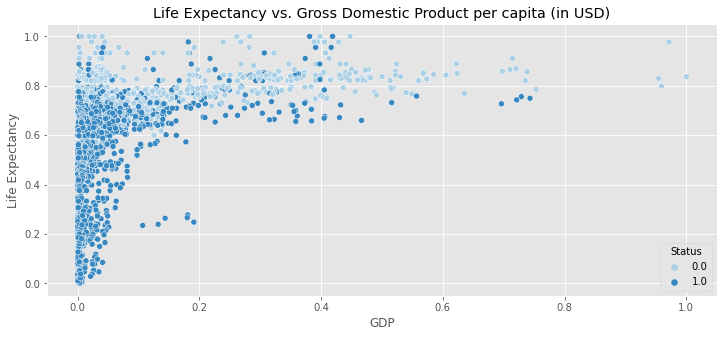

In [475]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot('GDP', 'Life_expectancy', data=df2, hue='Status', palette='Blues', ax=ax)
plt.title('Life Expectancy vs. Gross Domestic Product per capita (in USD)')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Life Expectancy')

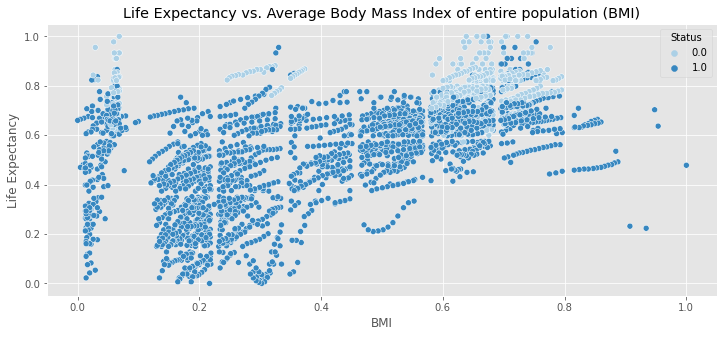

In [476]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot('BMI', 'Life_expectancy', data=df2, hue='Status', palette='Blues', ax=ax)
plt.title('Life Expectancy vs. Average Body Mass Index of entire population (BMI)')
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Life Expectancy')

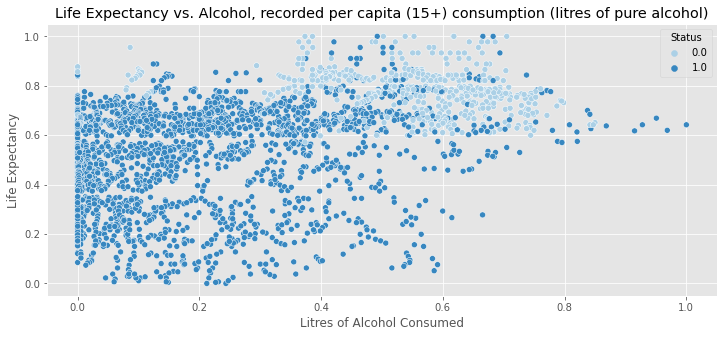

In [477]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot('Alcohol', 'Life_expectancy', data=df2, hue='Status', palette='Blues', ax=ax)
plt.title('Life Expectancy vs. Alcohol, recorded per capita (15+) consumption (litres of pure alcohol)')
plt.xlabel('Litres of Alcohol Consumed')
plt.ylabel('Life Expectancy')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Life Expectancy')

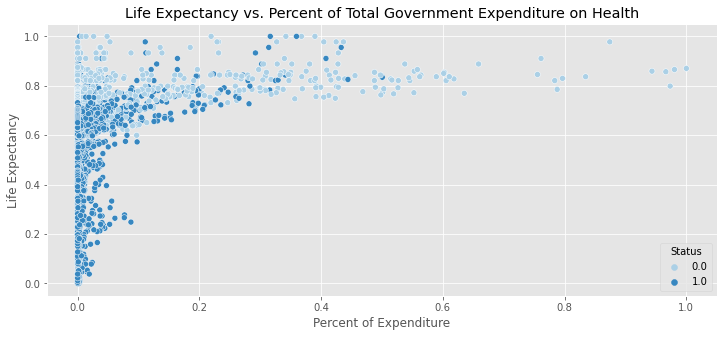

In [478]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot('Percentage_expenditure', 'Life_expectancy', data=df2, hue='Status', palette='Blues', ax=ax)
plt.title('Life Expectancy vs. Percent of Total Government Expenditure on Health')
plt.xlabel('Percent of Expenditure')
plt.ylabel('Life Expectancy')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Life Expectancy')

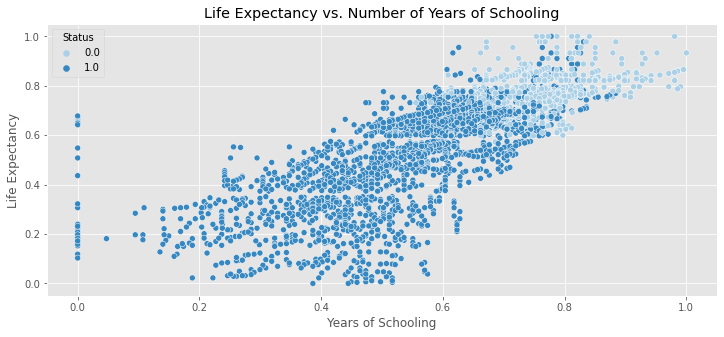

In [479]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot('Schooling', 'Life_expectancy', data=df2, hue='Status', palette='Blues', ax=ax)
plt.title('Life Expectancy vs. Number of Years of Schooling')
plt.xlabel('Years of Schooling')
plt.ylabel('Life Expectancy')

Removing Outliers

<AxesSubplot:>

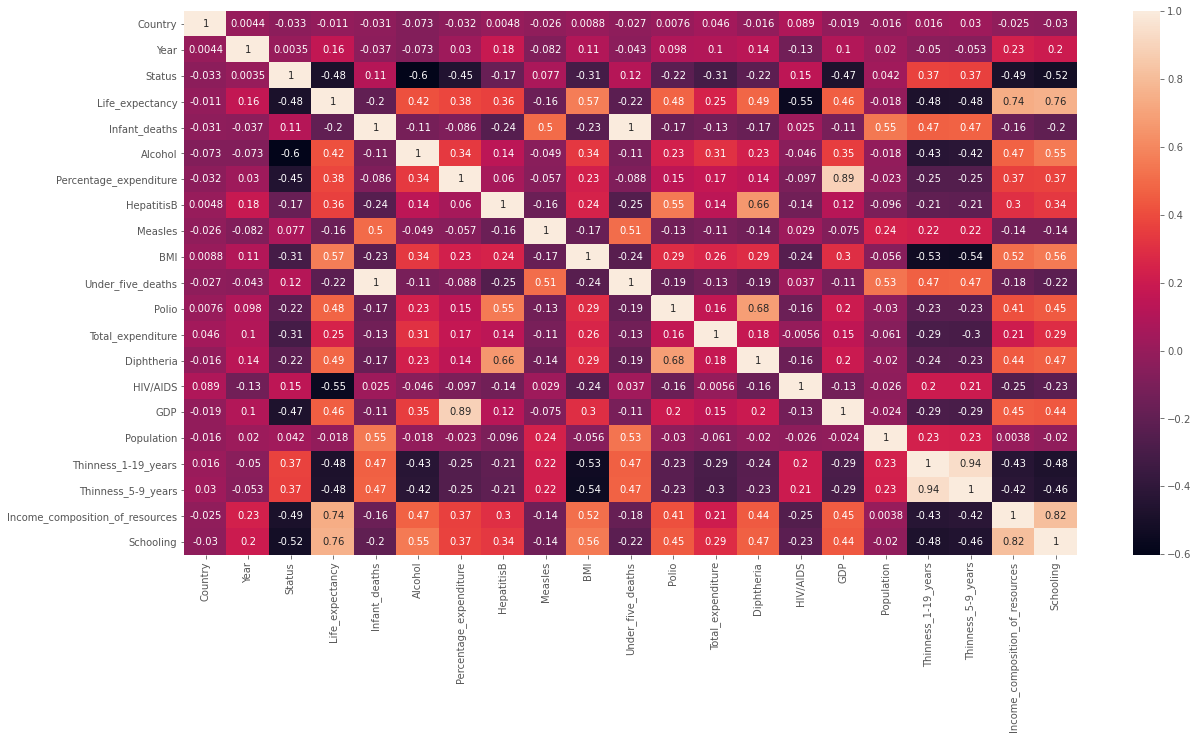

In [480]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df2.corr(), annot=True, ax=ax)

In [481]:
kle_labels = df2['Life_expectancy']

In [482]:
kle_features = df2.drop(['Life_expectancy'], axis=1)

In [483]:
kle_features

,Country,Year,Status,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
0,0.00,1.00,1.00,0.03,0.00,0.00,0.65,0.01,0.21,0.03,0.03,0.45,0.65,0.00,0.00,0.03,0.62,0.60,0.51,0.49
1,0.00,0.93,1.00,0.04,0.00,0.00,0.62,0.00,0.20,0.03,0.57,0.45,0.62,0.00,0.01,0.00,0.63,0.61,0.50,0.48
2,0.00,0.87,1.00,0.04,0.00,0.00,0.64,0.00,0.20,0.04,0.61,0.45,0.64,0.00,0.01,0.02,0.64,0.62,0.50,0.48
3,0.00,0.80,1.00,0.04,0.00,0.00,0.67,0.01,0.19,0.04,0.67,0.47,0.67,0.00,0.01,0.00,0.64,0.63,0.49,0.47
4,0.00,0.73,1.00,0.04,0.00,0.00,0.68,0.01,0.19,0.04,0.68,0.44,0.68,0.00,0.00,0.00,0.66,0.64,0.48,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,1.00,0.27,1.00,0.01,0.24,0.00,0.68,0.00,0.30,0.02,0.67,0.39,0.65,0.66,0.00,0.01,0.34,0.33,0.43,0.44
2924,1.00,0.20,1.00,0.01,0.23,0.00,0.06,0.00,0.30,0.02,0.04,0.36,0.68,0.72,0.00,0.01,0.35,0.34,0.44,0.46
2925,1.00,0.13,1.00,0.01,0.25,0.00,0.73,0.00,0.29,0.02,0.73,0.36,0.71,0.79,0.00,0.00,0.04,0.04,0.45,0.48
2926,1.00,0.07,1.00,0.01,0.10,0.00,0.77,0.00,0.29,0.02,0.76,0.34,0.75,0.83,0.00,0.01,0.05,0.06,0.45,0.47


In [484]:
kle_features_train, kle_features_test, kle_labels_train, kle_labels_test = train_test_split(kle_features, kle_labels, train_size=0.8, test_size=0.2)

In [485]:
linear_model = LinearRegression()

In [486]:
linear_model.fit(kle_features_train, kle_labels_train)

LinearRegression()

In [487]:
print('R_square score on the training set: %.2f' % linear_model.score(kle_features_train, kle_labels_train))

R_square score on the training set: 0.81


In [488]:
linear_model_predict = linear_model.predict(kle_features_test)

In [490]:
print('Coefficients: \n', linear_model.coef_)
print('Mean squared error: %.5f' % mean_squared_error(kle_labels_test, linear_model_predict))
print('Mean absolute error: %.5f' % mean_absolute_error(kle_labels_test, linear_model_predict))
print('R_square score: %.5f' % r2_score(kle_labels_test, linear_model_predict))

Coefficients: 
 [ 0.03250995 -0.02617126 -0.02741061  3.89508924 -0.00887356  0.02493007
  0.01287421 -0.0144877   0.07823147 -4.0015125   0.0535758   0.0301494
  0.04755091 -0.72951883  0.15828472 -0.00589714 -0.03069304 -0.03085976
  0.16107648  0.42550303]
Mean squared error: 0.00825
Mean absolute error: 0.07010
R_square score: 0.80454


In [491]:
scoring = make_scorer(r2_score)

In [492]:
scoring

make_scorer(r2_score)

In [493]:
grid_cv = GridSearchCV(Ridge(), param_grid={'alpha': range(0, 10), 'max_iter': [10, 1000, 1000]}, scoring=scoring, cv=5)

In [494]:
grid_cv.fit(kle_features_train, kle_labels_train)
print('Best Params: ' + str(grid_cv.best_params_))
print('Best Estimator: ' + str(grid_cv.best_estimator_))
print('Best Score: ' + str(grid_cv.best_score_))


Best Params: {'alpha': 0, 'max_iter': 10}
Best Estimator: Ridge(alpha=0, max_iter=10)
Best Score: 0.8033494306988164


In [495]:
result = grid_cv.cv_results_
result

{'mean_fit_time': array([0.00596337, 0.00381098, 0.00376725, 0.00336242, 0.00253148,
        0.00220208, 0.00242825, 0.00217495, 0.00252614, 0.00302076,
        0.00311627, 0.00289788, 0.00352979, 0.00291967, 0.00309234,
        0.00304441, 0.00232539, 0.00225549, 0.00241256, 0.00223184,
        0.0021471 , 0.00251966, 0.00219588, 0.0021862 , 0.00225339,
        0.0022656 , 0.00310721, 0.00278258, 0.00321913, 0.00286732]),
 'std_fit_time': array([5.04060416e-03, 1.31444951e-03, 6.69642456e-04, 4.93951490e-04,
        2.01739563e-04, 7.82706662e-05, 5.55274432e-04, 6.44864037e-05,
        1.65401786e-04, 5.58004206e-04, 5.24003003e-04, 3.89031873e-04,
        4.78756926e-04, 5.07394240e-04, 6.93145842e-04, 4.33444305e-04,
        2.56301529e-04, 1.07653357e-04, 1.65407655e-04, 6.30846730e-05,
        4.07570546e-05, 5.67007672e-04, 5.82302714e-05, 7.39913306e-05,
        1.36589136e-04, 1.40924106e-04, 5.62679699e-04, 4.96575913e-04,
        2.33747258e-04, 3.22693310e-04]),
 'mean_scor

In [496]:
print('R_square score on training data: %.5f' % grid_cv.score(kle_features_train, kle_labels_train))
print('R_square score: %.5f' % r2_score(kle_labels_test, grid_cv.best_estimator_.predict(kle_features_test)))
print('Mean squared error: %.5f' % mean_squared_error(kle_labels_test, linear_model_predict))
print('mean absolute error: %.5f' % mean_absolute_error(kle_labels_test, linear_model_predict))

R_square score on training data: 0.80802
R_square score: 0.80454
Mean squared error: 0.00825
mean absolute error: 0.07010


In [497]:
scoring = make_scorer(r2_score)

In [498]:
grid_cv = GridSearchCV(Lasso(), param_grid={'alpha': range(1, 100), 'max_iter': [10, 100, 1000, 10000]}, scoring=scoring, cv=5)

In [499]:
grid_cv.fit(kle_features_train, kle_labels_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': range(1, 100),
                         'max_iter': [10, 100, 1000, 10000]},
             scoring=make_scorer(r2_score))

In [500]:
print('Best parameters: ' + str(grid_cv.best_params_))

Best parameters: {'alpha': 1, 'max_iter': 10}


In [501]:
result = grid_cv.cv_results_

In [502]:
print('R_square score on training data: %.5f' % grid_cv.score(kle_features_train, kle_labels_train))
print('R_square score: %.5f' % r2_score(kle_labels_test, grid_cv.best_estimator_.predict(kle_features_test)))
print('Mean squared error: %.5f' % mean_squared_error(kle_labels_test, linear_model_predict))
print('Mean absolute error: %.5f' % mean_absolute_error(kle_labels_test, linear_model_predict))

R_square score on training data: 0.00000
R_square score: -0.00135
Mean squared error: 0.00825
Mean absolute error: 0.07010


In [503]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(ElasticNet(), param_grid = {'alpha': range(1, 10), 'max_iter': [10, 100, 1000], 'l1_ratio': [0.1, 0.4, 0.8]}, scoring=scoring, cv=5)

In [504]:
grid_cv.fit(kle_features_train, kle_labels_train)
print('Best parameters: ' + str(grid_cv.best_params_))


Best parameters: {'alpha': 1, 'l1_ratio': 0.1, 'max_iter': 10}


In [505]:
result = grid_cv.cv_results_

In [506]:
print('R_square score on training data: %.2f' % grid_cv.score(kle_features_train, kle_labels_train))
print('R_square score: %.2f' % r2_score(kle_labels_test, grid_cv.best_estimator_.predict(kle_features_test)))
print('Mean squared error: %.2f' % mean_squared_error(kle_labels_test, linear_model_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(kle_labels_test, linear_model_predict))

R_square score on training data: 0.00
R_square score: -0.00
Mean squared error: 0.01
Mean absolute error: 0.07


### Decision Tree Regressor 

In [507]:
dt_model = DecisionTreeRegressor()

In [508]:
dt_fit = dt_model.fit(kle_features_train, kle_labels_train)

In [509]:
dt_score = cross_val_score(dt_fit, kle_features_train, kle_labels_train, cv=5)

In [510]:
print('Mean Cross Val Score: %.2f' % np.mean(dt_score))
print('Score without CV: %.2f' % dt_fit.score(kle_features_train, kle_labels_train))
print('R_square score on the test data: %.2f' % r2_score(kle_labels_test, dt_fit.predict(kle_features_test)))

Mean Cross Val Score: 0.90
Score without CV: 1.00
R_square score on the test data: 0.90


In [511]:
dt_model_predict = dt_model.predict(kle_features_test)

In [512]:
scoring = make_scorer(r2_score)

In [513]:
grid_cv = GridSearchCV(DecisionTreeRegressor(), param_grid = {'min_samples_split': range(2, 10)}, scoring=scoring, cv=5)

In [514]:
grid_cv.fit(kle_features_train, kle_labels_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'min_samples_split': range(2, 10)},
             scoring=make_scorer(r2_score))

In [515]:
grid_cv.best_params_

{'min_samples_split': 9}

In [516]:
result = grid_cv.cv_results_

In [517]:
print('R_square score on training data: %.2f' % grid_cv.best_estimator_.score(kle_features_train, kle_labels_train))
print('R_square score: %.2f' % r2_score(kle_labels_test, grid_cv.best_estimator_.predict(kle_features_test)))
print('Mean squared error: %.2f' % mean_squared_error(kle_labels_test, dt_model_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(kle_labels_test, dt_model_predict))

R_square score on training data: 0.99
R_square score: 0.91
Mean squared error: 0.00
Mean absolute error: 0.04


In [518]:
rf_model = RandomForestRegressor()

In [519]:
rf_fit = rf_model.fit(kle_features_train, kle_labels_train)

In [520]:
rf_score = cross_val_score(rf_fit, kle_features_train, kle_labels_train, cv=5)

In [521]:
print('Mean cross val score: %.2f' % np.mean(rf_score))
print('Score without cv: %.2f' % rf_fit.score(kle_features_train, kle_labels_train))
print('R_square score on the test data: %.2f' % r2_score(kle_labels_test, rf_fit.predict(kle_features_test)))

Mean cross val score: 0.95
Score without cv: 0.99
R_square score on the test data: 0.96


In [522]:
rf_model_predict = rf_model.predict(kle_features_test)

In [523]:
scoring = make_scorer(r2_score)

In [524]:
grid_cv = GridSearchCV(RandomForestRegressor(), param_grid = {'min_samples_split': range(2, 10)}, scoring=scoring, cv=5)

In [525]:
grid_cv.fit(kle_features_train, kle_labels_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'min_samples_split': range(2, 10)},
             scoring=make_scorer(r2_score))

In [526]:
grid_cv.best_params_

{'min_samples_split': 2}

In [527]:
result = grid_cv.cv_results_

In [528]:
print('R_square score on training data: %.2f' % grid_cv.best_estimator_.score(kle_features_train, kle_labels_train))
print('R_square score: %.2f' % r2_score(kle_labels_test, grid_cv.best_estimator_.predict(kle_features_test)))
print('Mean squared error: %.5f' % mean_squared_error(kle_labels_test, dt_model_predict))
print('Mean absolute error: %.5f' % mean_absolute_error(kle_labels_test, dt_model_predict))

R_square score on training data: 0.99
R_square score: 0.96
Mean squared error: 0.00407
Mean absolute error: 0.03762


In [529]:
kle_features

,Country,Year,Status,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
0,0.00,1.00,1.00,0.03,0.00,0.00,0.65,0.01,0.21,0.03,0.03,0.45,0.65,0.00,0.00,0.03,0.62,0.60,0.51,0.49
1,0.00,0.93,1.00,0.04,0.00,0.00,0.62,0.00,0.20,0.03,0.57,0.45,0.62,0.00,0.01,0.00,0.63,0.61,0.50,0.48
2,0.00,0.87,1.00,0.04,0.00,0.00,0.64,0.00,0.20,0.04,0.61,0.45,0.64,0.00,0.01,0.02,0.64,0.62,0.50,0.48
3,0.00,0.80,1.00,0.04,0.00,0.00,0.67,0.01,0.19,0.04,0.67,0.47,0.67,0.00,0.01,0.00,0.64,0.63,0.49,0.47
4,0.00,0.73,1.00,0.04,0.00,0.00,0.68,0.01,0.19,0.04,0.68,0.44,0.68,0.00,0.00,0.00,0.66,0.64,0.48,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,1.00,0.27,1.00,0.01,0.24,0.00,0.68,0.00,0.30,0.02,0.67,0.39,0.65,0.66,0.00,0.01,0.34,0.33,0.43,0.44
2924,1.00,0.20,1.00,0.01,0.23,0.00,0.06,0.00,0.30,0.02,0.04,0.36,0.68,0.72,0.00,0.01,0.35,0.34,0.44,0.46
2925,1.00,0.13,1.00,0.01,0.25,0.00,0.73,0.00,0.29,0.02,0.73,0.36,0.71,0.79,0.00,0.00,0.04,0.04,0.45,0.48
2926,1.00,0.07,1.00,0.01,0.10,0.00,0.77,0.00,0.29,0.02,0.76,0.34,0.75,0.83,0.00,0.01,0.05,0.06,0.45,0.47


In [531]:
feature_importances = pd.DataFrame(rf_fit.feature_importances_,
                                   index = kle_features.columns, columns=['importance']).sort_values('importance', ascending=False)

In [532]:
feature_importances

,importance
Income_composition_of_resources,0.47
HIV/AIDS,0.38
Schooling,0.02
BMI,0.02
Thinness_5-9_years,0.01
Under_five_deaths,0.01
Alcohol,0.01
Total_expenditure,0.01
Polio,0.01
Year,0.01
